In [5]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression() # set up classifier object which generates the model object
# start from before
h = 1
sd = 1
n = 50

def gen_data(n, h, sd1, sd2):
    # mean, sd, number of points to generate
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

(x1, y1, x2, y2) = gen_data(n, h, 1, 1.5)
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)
# end from before


clf = LogisticRegression() # set up classifier object which generates the model object
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
X_train.shape
clf.fit(X_train, y_train)

# The above block is from before

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# What does the pattern of probabilities across the grid (at 7:34 in Video 5.2.4) indicate about  𝑋1  and  𝑋2 ?
#              The class probability is determined mostly by  𝑋1 .
# The sum of the class probabilities: 
#              will always equal 1 for any number of classes.
# Internet says: The sum of the probabilities in a probability distribution is always 1. A probability distribution is a collection of 
# probabilities that defines the likelihood of observing all of the various outcomes of an event or experiment.

In [7]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

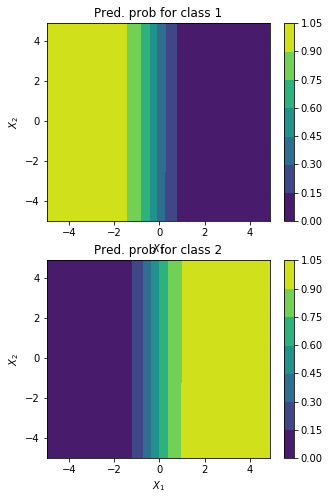

In [4]:
# got next line from the internet
%matplotlib inline

plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");